In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
import seaborn as sns
#suppress exponential notation, define an appropriate float formatter
pd.set_option('display.float_format', lambda x: '%.12f' % x)
np.set_printoptions(suppress=True)
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.3f}'.format}, linewidth=130)

In [3]:
#Importing the mmm dataset and the meta stock datset
data = pd.read_csv(r"/Users/sai/Desktop/meta_datasets/data_mmm.csv")
stock = pd.read_csv(r"/Users/sai/Desktop/meta_datasets/META_stock.csv")
data.reset_index(drop = True, inplace = True)
data

,date,sales,unemployment,temperature,facebook_newsfeed_spend,facebook_newsfeed_impressions,youtube_brand_spend,youtube_brand_impressions,search_spend,search_clicks,youtube_performance_spend,youtube_performance_impressions,newspaper_spend,newspaper_readership,tv_spend,tv_gross_rating_points,cpi
0,7/1/19,1101354.885999999940,3.700000000000,66.232031990000,10955.746569999999,11352112,24992.275249999999,14428173,21080.514650000001,9380,29223.101879999998,6838661,12178.572570000000,747190,21990.207360000000,1370779,255.900000000000
1,7/2/19,1084979.777999999933,3.700000000000,67.876946230000,10837.918130000000,11784249,27312.725090000000,12907289,19896.001069999998,8803,27183.069469999999,6680114,12076.154300000000,840911,18402.636800000000,1127588,255.900000000000
2,7/3/19,1088240.595999999903,3.700000000000,74.542169270000,11198.044990000000,10989205,25219.412680000001,11895368,24844.982779999998,11619,24559.172090000000,6010005,11851.026000000000,1141541,21716.002600000000,1095842,255.900000000000
3,7/4/19,1083313.955000000075,3.700000000000,66.685905740000,10832.997670000001,11956619,25182.957610000001,11617086,26477.719890000000,12617,26708.230899999999,6442621,11849.613470000000,1015797,18683.237809999999,1247539,255.900000000000
4,7/5/19,1075850.402999999933,3.700000000000,53.427353320000,10012.579630000000,8949200,25784.007210000000,12394510,21660.480240000001,9334,24525.589400000001,6011511,12349.159270000000,850827,15713.695100000001,1351751,255.900000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,6/27/22,1243496.611999999965,3.600000000000,52.222738930000,11562.610610000000,10390172,23405.445769999998,12292103,20665.164400000001,9048,30531.351800000000,7407679,11664.542949999999,1163102,22786.385340000001,1320476,295.328000000000
1093,6/28/22,1222262.040999999968,3.600000000000,50.773980740000,10829.283380000001,8803732,24776.886419999999,10476701,23908.324540000001,10372,24961.407820000000,6286301,11745.759940000000,1393292,23874.309389999999,1657989,295.328000000000
1094,6/29/22,1236555.706000000006,3.600000000000,73.503568550000,10570.495569999999,12212089,21148.138900000002,8950451,23943.035420000000,10093,29116.796549999999,7039013,11906.210470000000,879075,18685.619149999999,1110664,295.328000000000
1095,6/30/22,1219667.908999999985,3.600000000000,74.702543980000,11143.865990000000,9699706,25080.703710000002,11784404,22814.485250000002,10211,33778.852350000001,8376343,11273.053860000000,970041,16173.309770000000,1286138,295.328000000000


In [4]:
stock

,date,Open,High,Low,Close,Adj Close,Volume
0,1/2/19,128.990005000000,137.509995000000,128.559998000000,135.679993000000,135.679993000000,28146200
1,1/3/19,134.690002000000,137.169998000000,131.119995000000,131.740005000000,131.740005000000,22717900
2,1/4/19,134.009995000000,138.000000000000,133.750000000000,137.949997000000,137.949997000000,29002100
3,1/7/19,137.559998000000,138.869995000000,135.910004000000,138.050003000000,138.050003000000,20089300
4,1/8/19,139.889999000000,143.139999000000,139.539993000000,142.529999000000,142.529999000000,26263800
...,...,...,...,...,...,...,...
939,9/23/22,141.419998000000,142.619995000000,138.889999000000,140.410004000000,140.410004000000,31710700
940,9/26/22,140.119995000000,142.240005000000,136.190002000000,136.369995000000,136.369995000000,30497000
941,9/27/22,137.919998000000,139.419998000000,134.119995000000,134.399994000000,134.399994000000,30826500
942,9/28/22,134.619995000000,142.029999000000,134.270004000000,141.610001000000,141.610001000000,32658500


In [5]:
#Merging the stock datset and the mmm dataset
data = data.merge(stock, on='date', how='left')

In [6]:
data.to_csv (r"/Users/sai/Desktop/meta_datasets/enriched_weekly_data_mmm.csv", header=True) 

In [7]:
my_list = data.columns.values.tolist()
my_list

['date',
 'sales',
 'unemployment',
 'temperature',
 'facebook_newsfeed_spend',
 'facebook_newsfeed_impressions',
 'youtube_brand_spend',
 'youtube_brand_impressions',
 'search_spend',
 'search_clicks',
 'youtube_performance_spend',
 'youtube_performance_impressions',
 'newspaper_spend',
 'newspaper_readership',
 'tv_spend',
 'tv_gross_rating_points',
 'cpi',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume']

In [8]:
#convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

#Aggregating by mean of values, grouped by week or converting daily data to weekly level data
data = data.groupby([pd.Grouper(key='date', freq='W-MON')])[
 'date',
 'sales',
 'unemployment',
 'temperature',
 'cpi',
 'Close',
 'facebook_newsfeed_spend',
 'facebook_newsfeed_impressions',
 'youtube_brand_spend',
 'youtube_brand_impressions',
 'search_spend',
 'search_clicks',
 'youtube_performance_spend',
 'youtube_performance_impressions',
 'newspaper_spend',
 'newspaper_readership',
 'tv_spend',
 'tv_gross_rating_points'].mean()
data.rename(columns={'Close': 'stock_close'}, inplace=True)

/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/1194839030.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby([pd.Grouper(key='date', freq='W-MON')])[
/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/1194839030.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby([pd.Grouper(key='date', freq='W-MON')])[


In [9]:
data_copy = data.reset_index()

In [10]:
data_copy

,date,sales,unemployment,temperature,cpi,stock_close,facebook_newsfeed_spend,facebook_newsfeed_impressions,youtube_brand_spend,youtube_brand_impressions,search_spend,search_clicks,youtube_performance_spend,youtube_performance_impressions,newspaper_spend,newspaper_readership,tv_spend,tv_gross_rating_points
0,2019-07-01,1101354.885999999940,3.700000000000,66.232031990000,255.900000000000,193.000000000000,10955.746569999999,11352112.000000000000,24992.275249999999,14428173.000000000000,21080.514650000001,9380.000000000000,29223.101879999998,6838661.000000000000,12178.572570000000,747190.000000000000,21990.207360000000,1370779.000000000000
1,2019-07-08,1087474.214714285685,3.700000000000,59.262810185714,255.900000000000,196.089996500000,11035.383381428572,11231815.142857143655,25425.869585714285,12068123.857142856345,23423.235451428569,10866.428571428571,26691.024741428573,6550714.714285714552,12013.884552857142,1132554.285714285681,19672.637277142854,1207898.571428571362
2,2019-07-15,1072082.774857142707,3.700000000000,56.966737397143,255.900000000000,202.389999600000,10958.680188571429,10237887.000000000000,24773.727204285715,11952085.714285714552,22097.477681428572,9494.714285714286,22960.140552857141,5626502.142857142724,12071.483324285715,1009706.428571428522,19919.431285714287,1322371.857142857043
3,2019-07-22,1075394.477714285720,3.700000000000,58.104538810000,255.900000000000,201.420001200000,11105.739598571428,9514388.285714285448,24372.635482857146,11595440.285714285448,22603.202022857145,10117.857142857143,0.000000000000,0.000000000000,12330.202300000001,1012354.714285714319,20235.587449999999,1355338.142857142957
4,2019-07-29,1081686.490428571356,3.700000000000,70.660754508571,255.900000000000,200.684002800000,11225.601091428573,10209617.857142856345,25762.902981428571,12513586.142857143655,23119.048947142855,10451.285714285714,3626.396201428572,914338.285714285681,10122.118778571428,809391.428571428522,20408.591037142854,1206068.857142857043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2022-06-06,1221245.966999999946,3.600000000000,69.214644271429,294.777428571429,193.233999600000,11190.789489999999,9741942.142857143655,24141.878395714284,11669370.142857143655,23684.075818571429,10756.000000000000,28719.733988571428,6969850.428571428172,11798.197074285714,1068087.714285714319,0.000000000000,0.000000000000
154,2022-06-13,1224834.802999999840,3.600000000000,71.512245761429,295.328000000000,183.223999000000,11000.908451428570,9907449.714285714552,24417.860508571430,11494445.571428570896,24984.582597142860,11150.285714285714,24302.209902857143,5878076.857142857276,10233.156090000000,846251.142857142841,0.000000000000,0.000000000000
155,2022-06-20,1224195.668714285595,3.600000000000,80.887339368571,295.328000000000,164.422500500000,11184.485081428571,10294439.571428570896,24790.280778571429,11745814.714285714552,22106.783961428569,9523.857142857143,0.000000000000,0.000000000000,0.000000000000,0.000000000000,17789.238672857144,1177831.428571428638
156,2022-06-27,1224758.223428571364,3.600000000000,64.690021528571,295.328000000000,162.260003600000,10991.181884285714,9455034.571428570896,25529.806387142857,12508898.428571429104,22444.191161428571,10040.428571428571,4361.621685714285,1058239.857142857043,1666.363278571429,166157.428571428580,21002.115294285712,1271120.714285714319


<AxesSubplot: xlabel='date'>

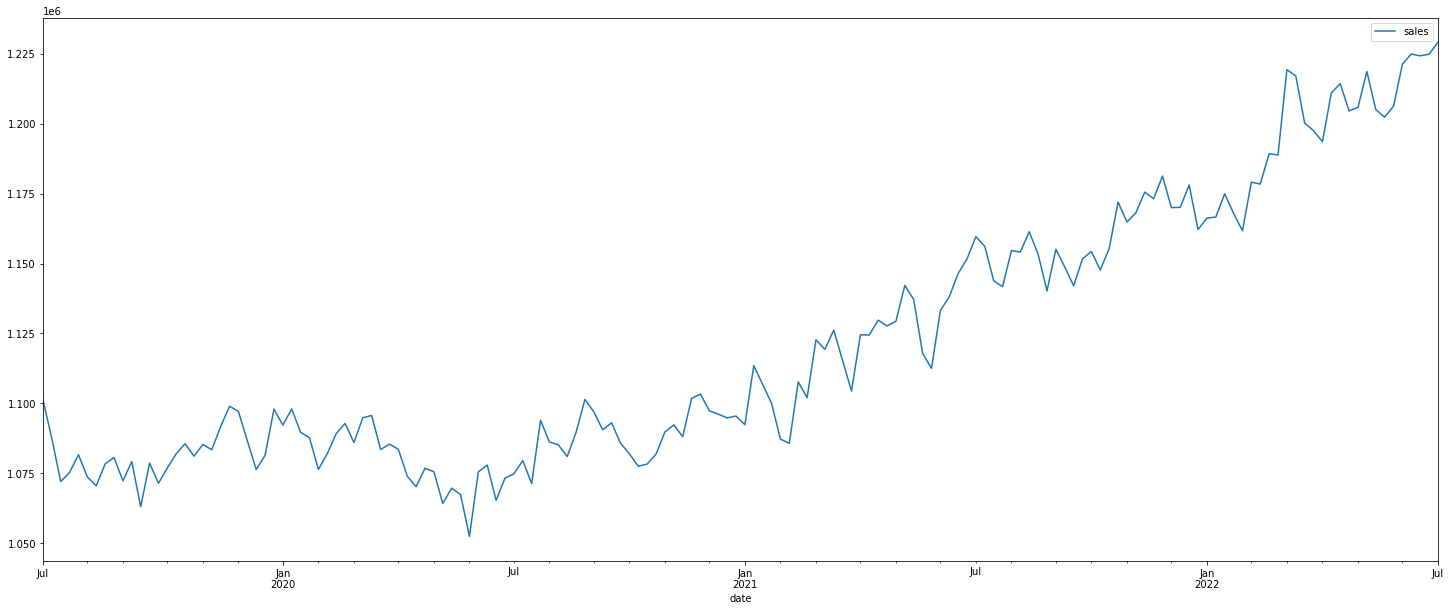

In [11]:
data_copy.plot('date','sales', figsize = (25,10))

<h1>Heat Map for all variables - including CPI and Stock_close prices

/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/779608135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_copy.corr()


<AxesSubplot: >

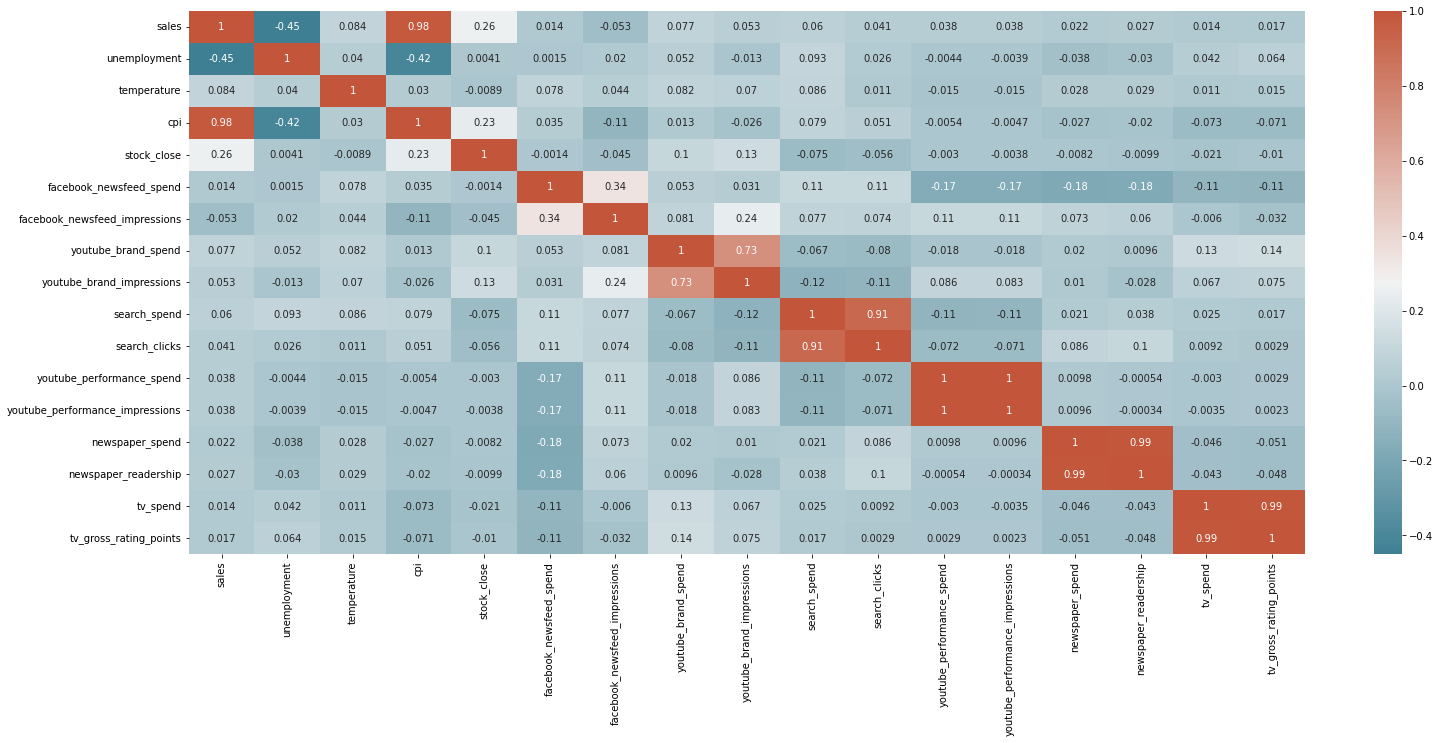

In [12]:
#Plotting correlation matrix
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

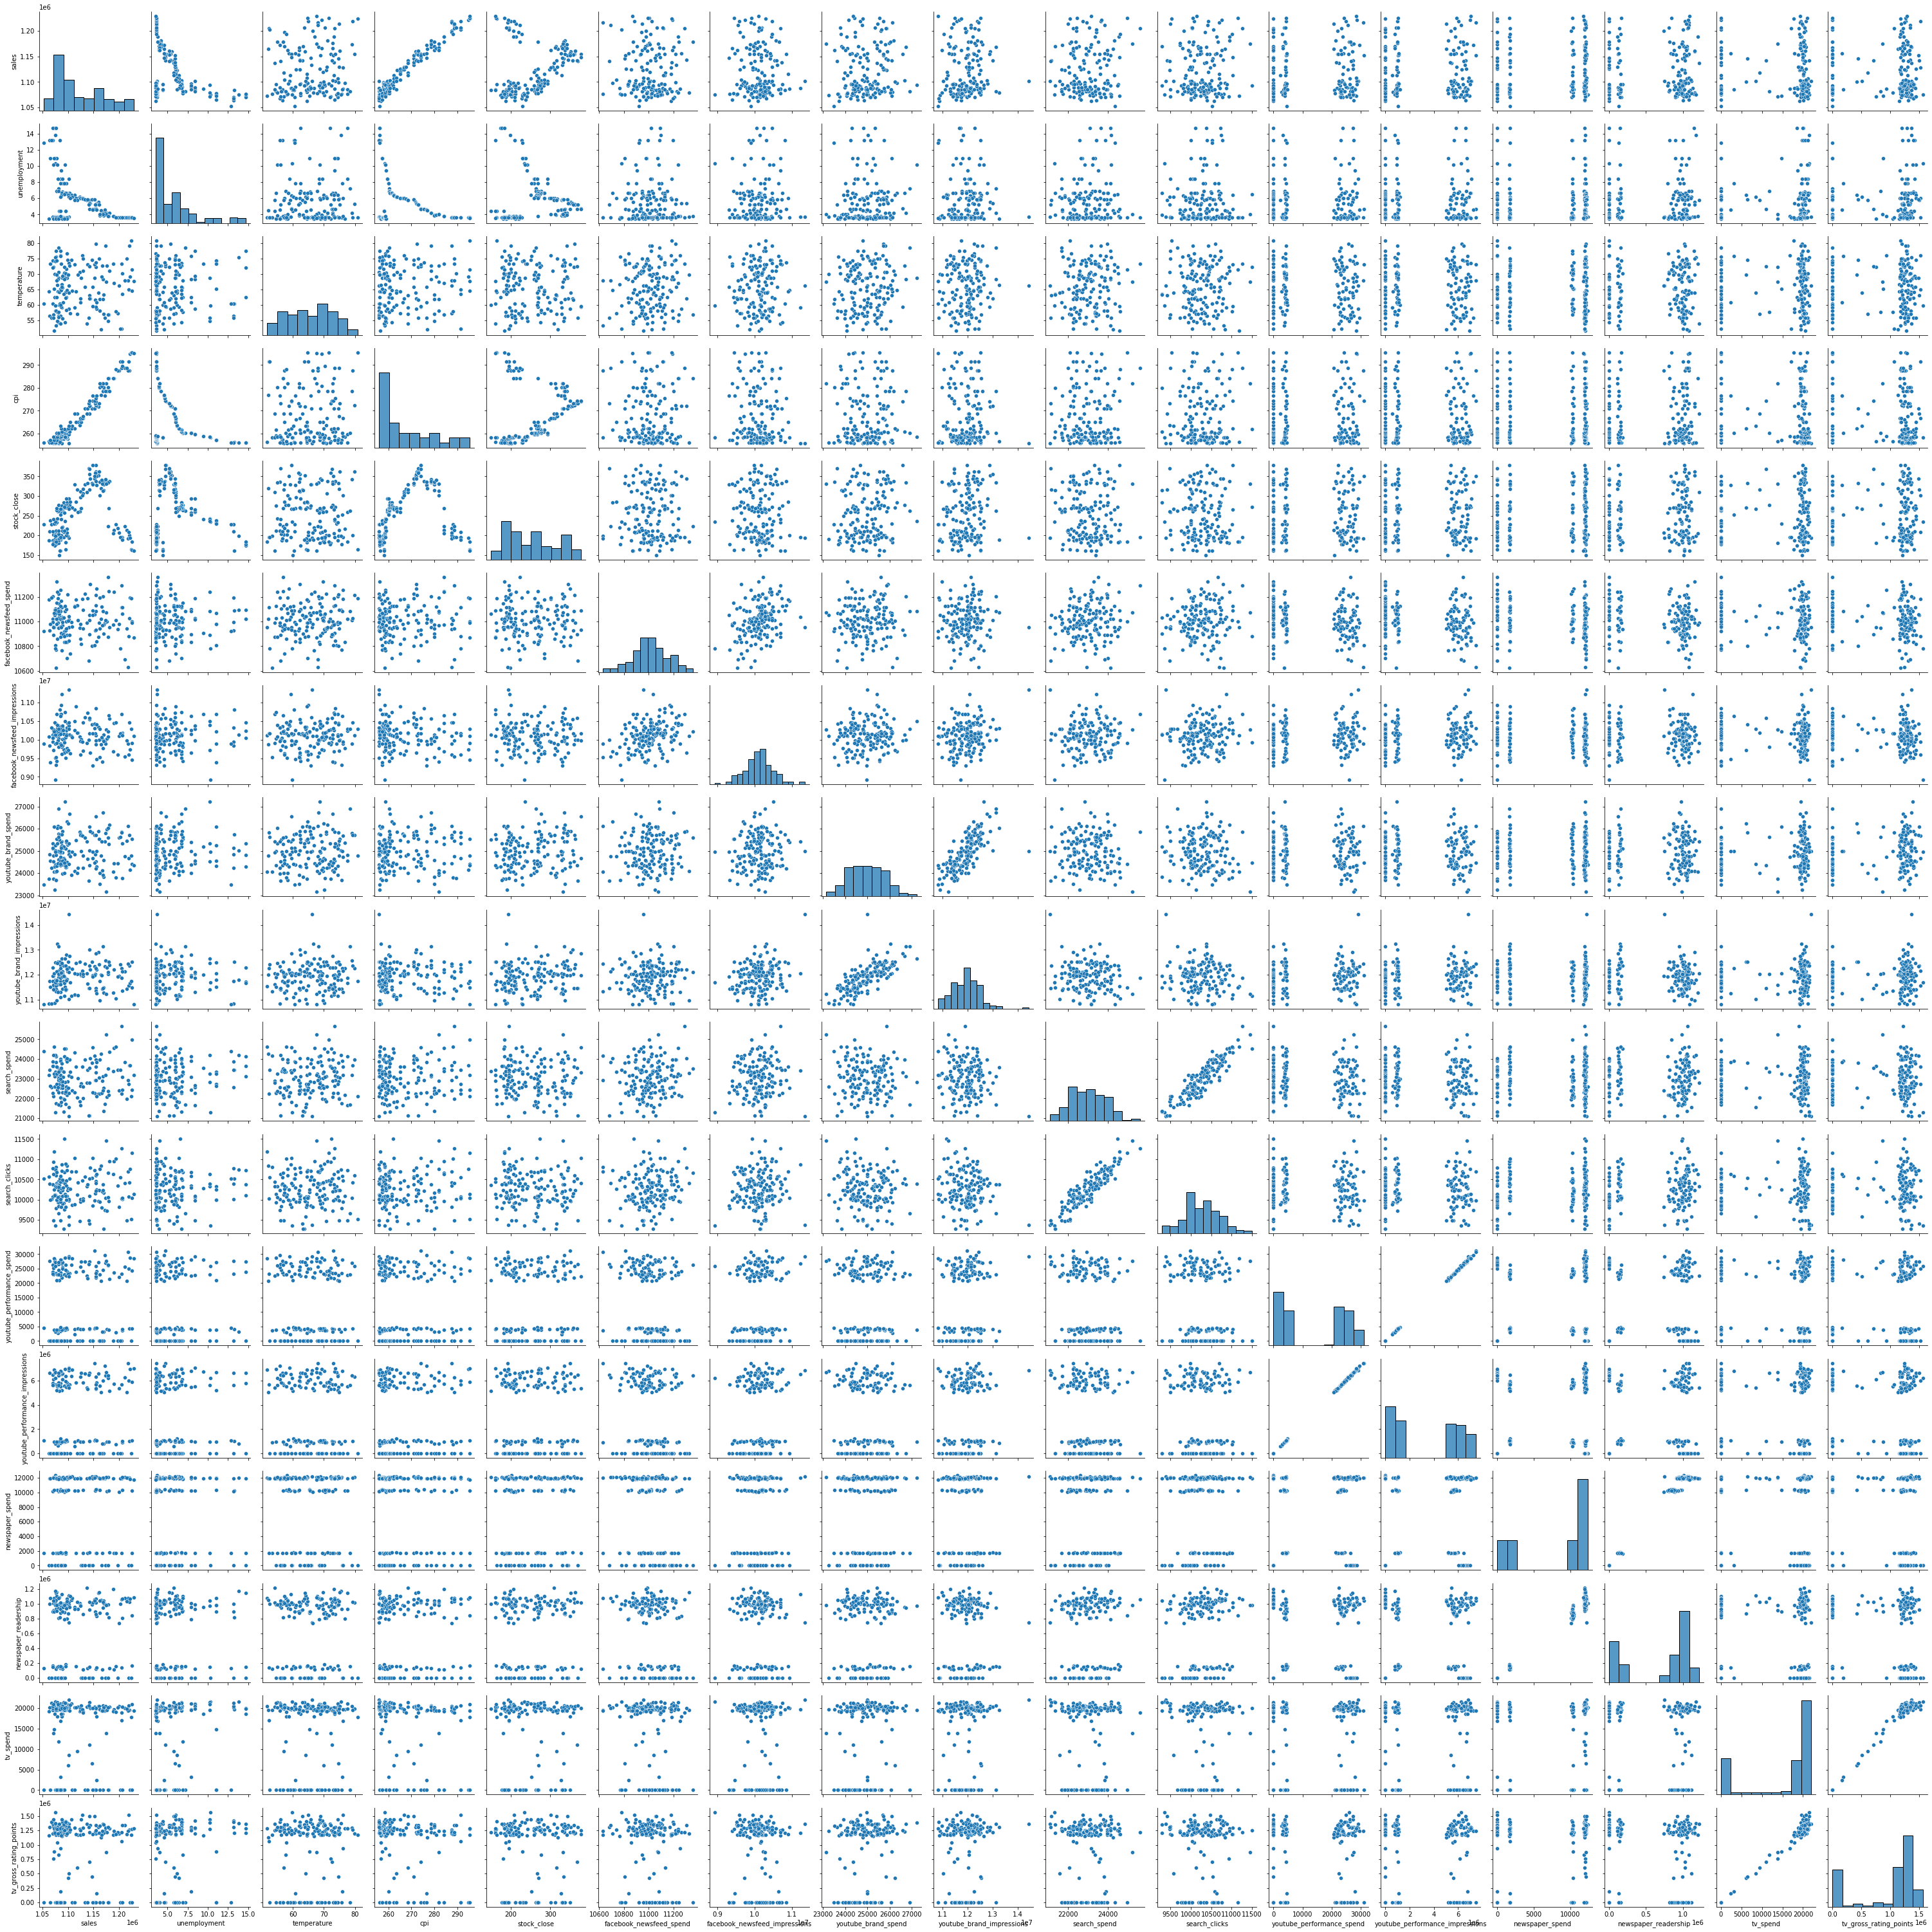

In [13]:
sns.pairplot(data_copy)

In [14]:
#Dropping all the highly correlated columns - all the spend variables as they are very highly correlated with impression variables and keeping the rest
X = data.drop(columns=["tv_spend", "youtube_performance_spend", "youtube_brand_spend", "facebook_newsfeed_spend", "search_spend", "sales", "newspaper_spend"])

y = data['sales']

<h1> Correlation matrix after removing all the spend varibles

<AxesSubplot: >

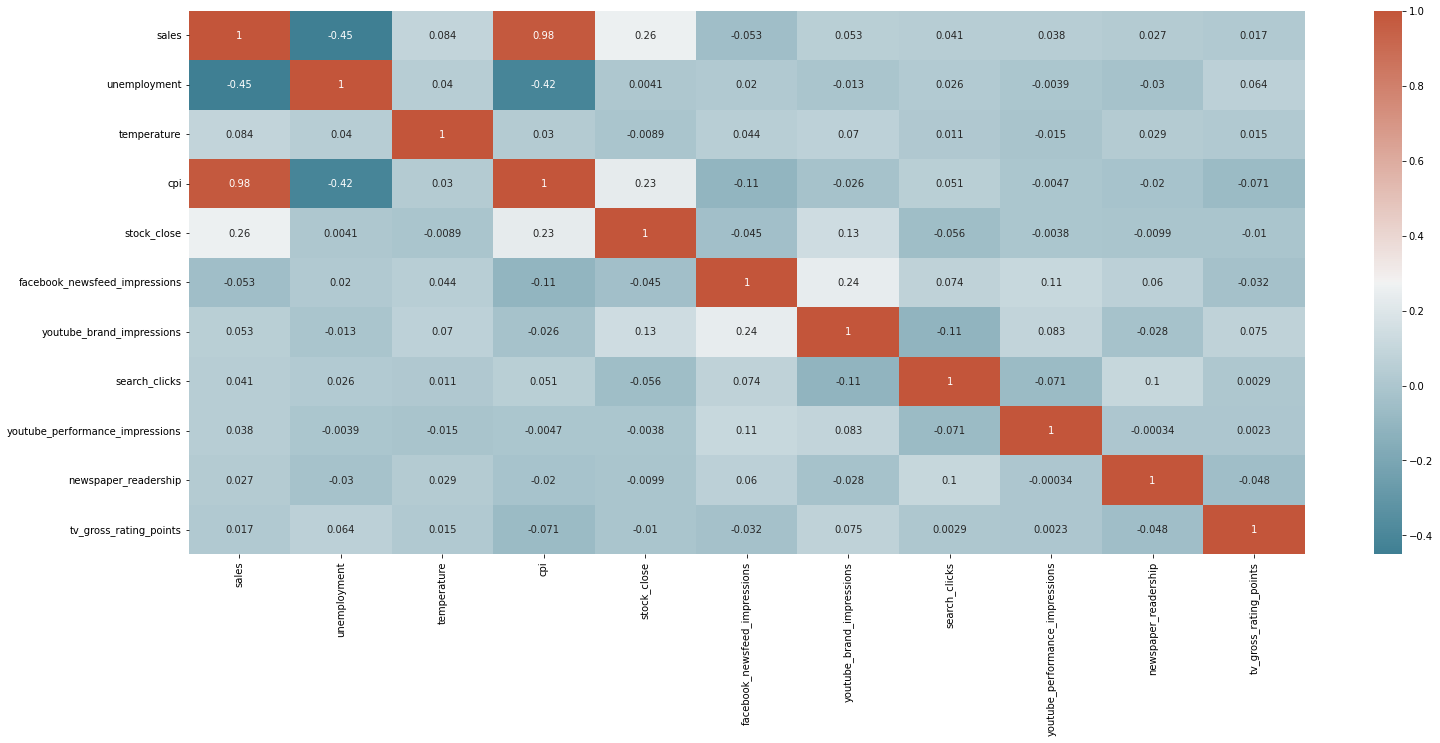

In [15]:
#Correlation matrix after removing highly correlated columns
dataset_with_removedcorr = data.drop(columns=["tv_spend", "youtube_performance_spend", "youtube_brand_spend", "facebook_newsfeed_spend", "search_spend", "newspaper_spend"])
corr = dataset_with_removedcorr.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

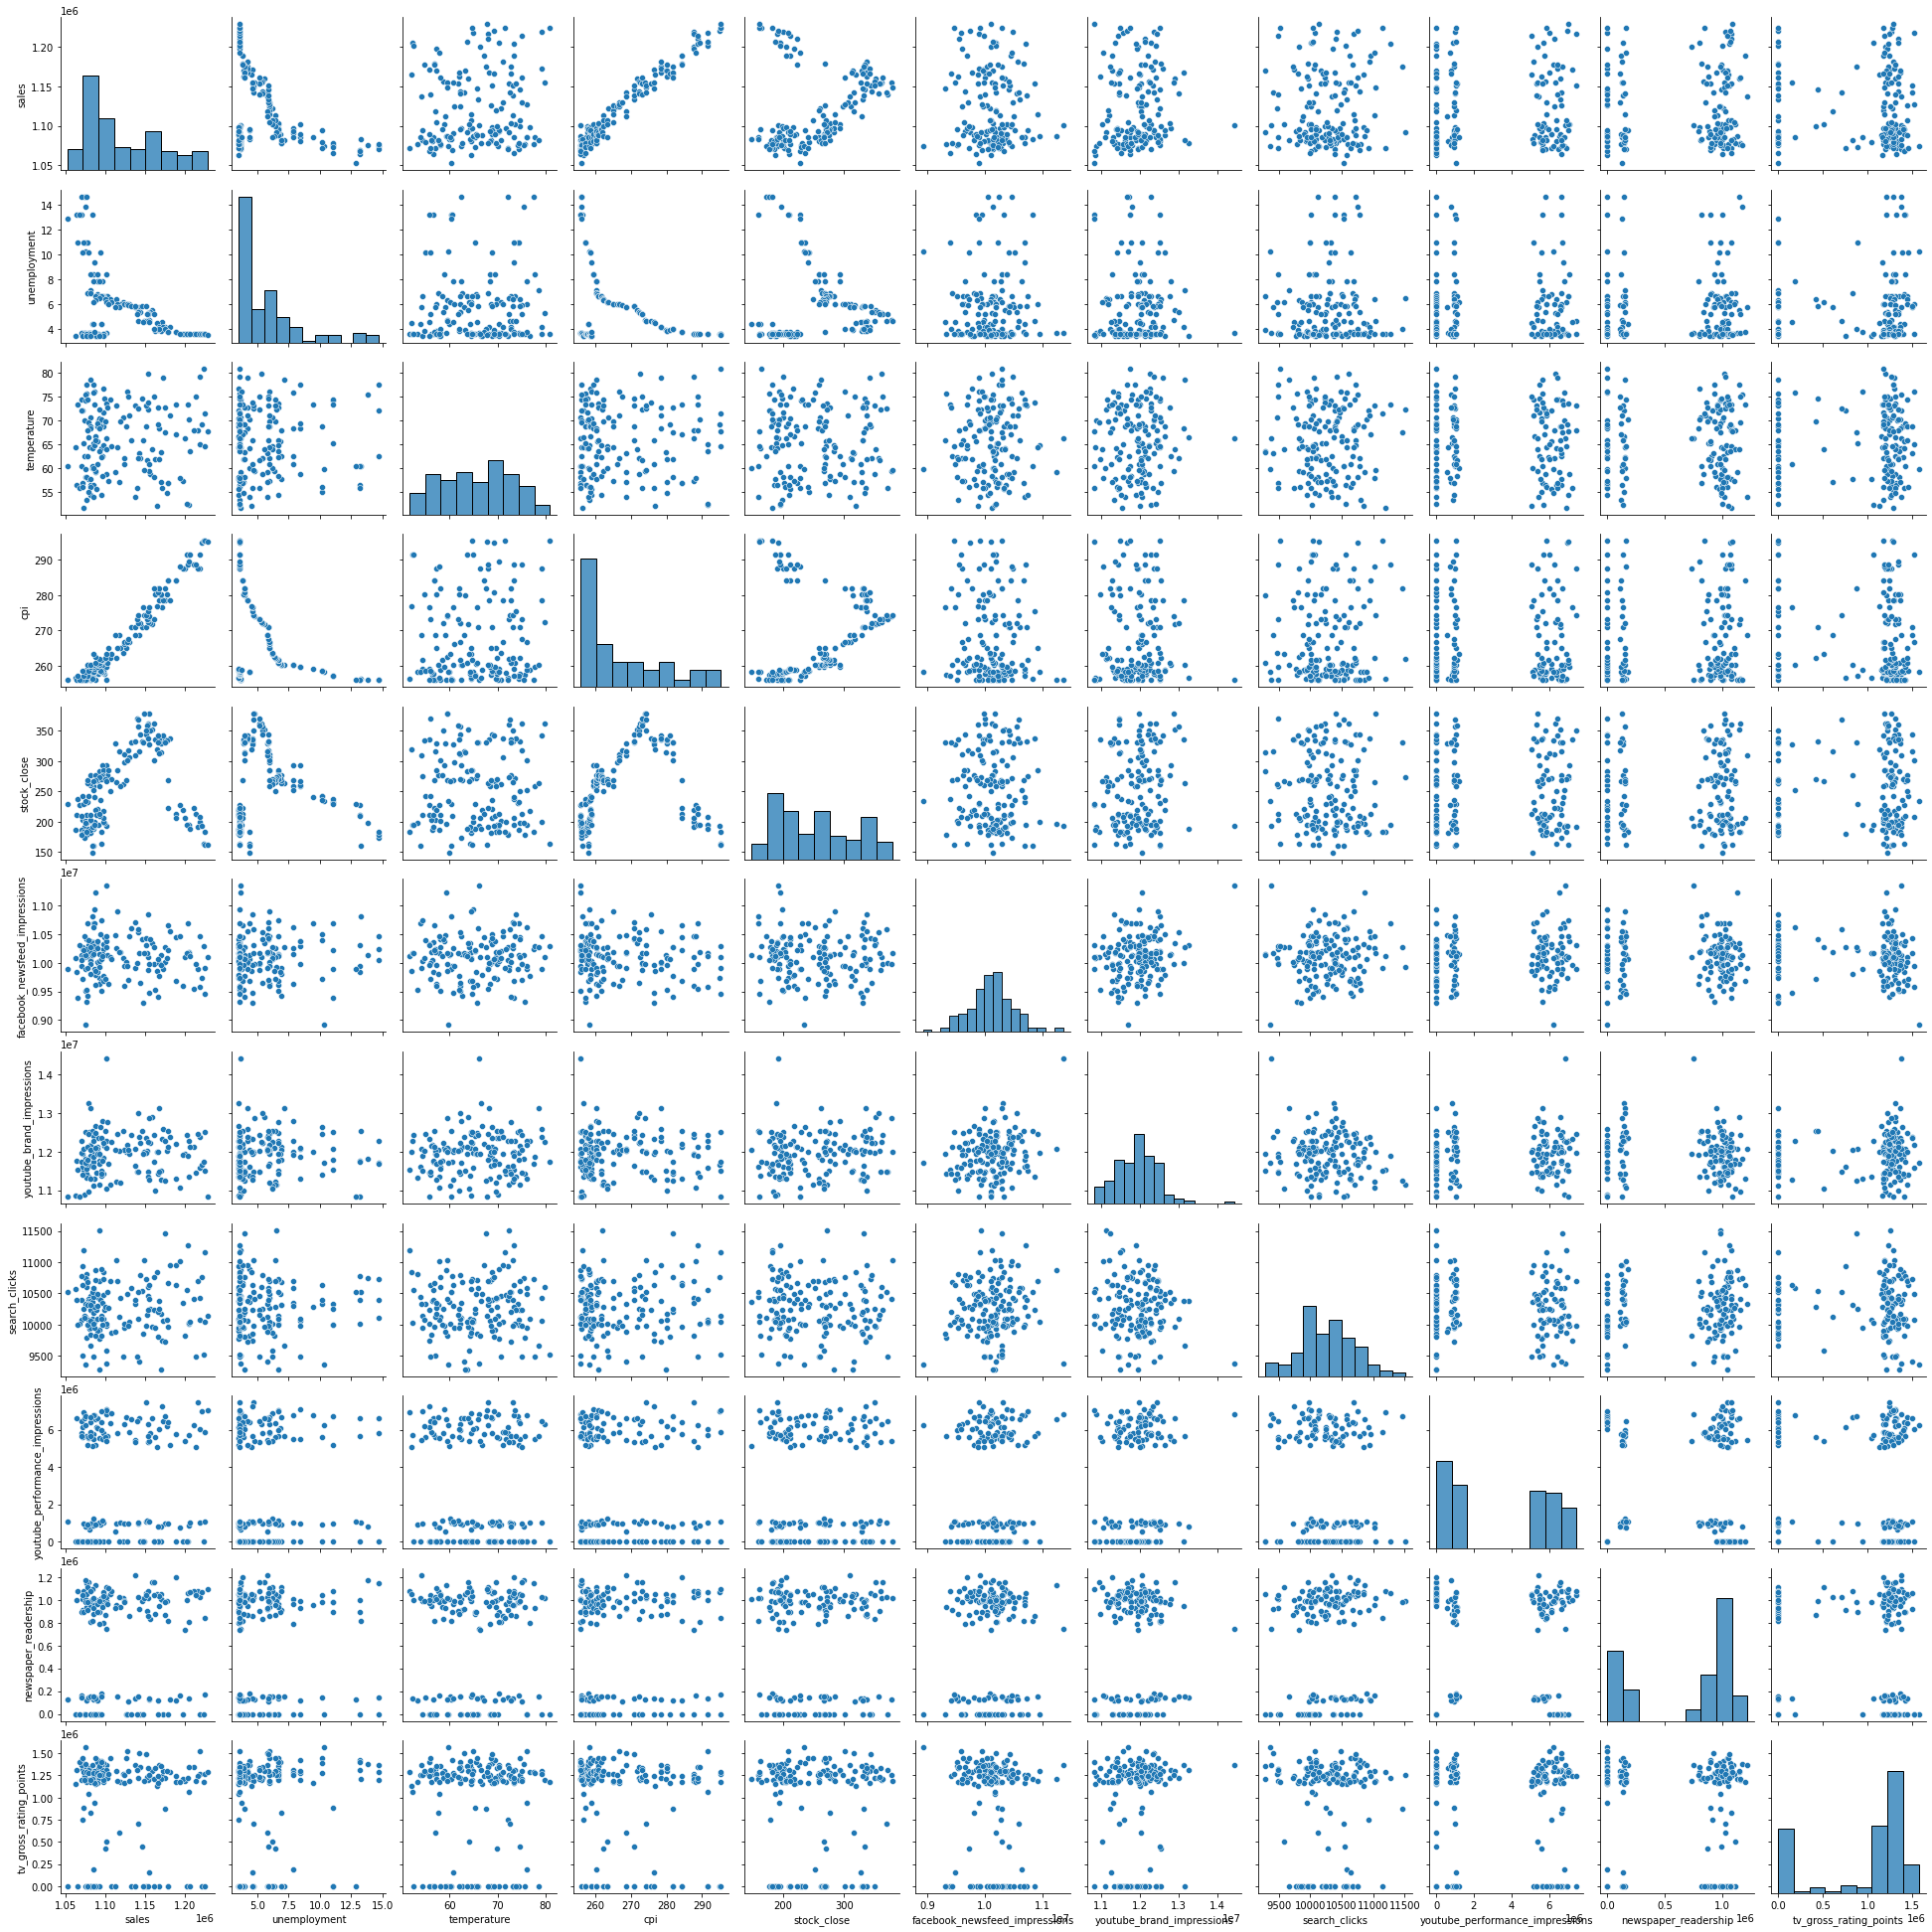

In [16]:
sns.pairplot(dataset_with_removedcorr)

In [17]:
from mamimo.time_utils import add_time_features, add_date_indicators


X = (X
     .pipe(add_time_features, month=True)
#     .assign(trend=range(158))
)

In [18]:
#taking only 135 weeks out of 158 weeks for analysis and training. We cn use the last 23 weeks to predict and evaluate the model on never before seen data

X_ = X[:135]
y_ = y[:135]

In [52]:
#from mamimo.time_utils import PowerTrend
from mamimo.carryover import ExponentialCarryover
from mamimo.saturation import ExponentialSaturation
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cats =  [list(range(1, 13))] # different months, known beforehand

preprocess = ColumnTransformer(
    [
     ('tv_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['tv_gross_rating_points']),
     ('newspaper_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['newspaper_readership']),
     ('youtube_performance_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['youtube_performance_impressions']),
        ('search_clicks_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['search_clicks']),
        ('youtube_brand_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['youtube_brand_impressions']),
        ('facebook_newsfeed_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
#            ('saturation', ExponentialSaturation())
     ]), ['facebook_newsfeed_impressions']),
        
    ('month', OneHotEncoder(sparse=False, categories=cats), ['month']),
#    ('trend', PowerTrend(), ['trend'])
    
    
], remainder = 'passthrough')

model = Pipeline([
    ('preprocess', preprocess),
    ('regression', LinearRegression(
        positive = False,
        fit_intercept=False 
        ) 
    )
])

In [57]:
#Performing optuna trials to get the optimal hyperparameters
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution

tuned_model = OptunaSearchCV(
    estimator=model,
    param_distributions={
        'preprocess__tv_pipe__carryover__window': IntUniformDistribution(8, 12),
        'preprocess__tv_pipe__carryover__strength': UniformDistribution(0.3, 0.8),
#        'preprocess__tv_pipe__saturation__exponent': UniformDistribution(0, 0.01),
        
        'preprocess__newspaper_pipe__carryover__window': IntUniformDistribution(4, 6),
        'preprocess__newspaper_pipe__carryover__strength': UniformDistribution(0.1, 0.4),
#        'preprocess__newspaper_pipe__saturation__exponent': UniformDistribution(0, 0.01),
        
        'preprocess__youtube_performance_pipe__carryover__window': IntUniformDistribution(8, 12),
        'preprocess__youtube_performance_pipe__carryover__strength': UniformDistribution(0.0, 0.3),
#        'preprocess__youtube_performance_pipe__saturation__exponent': UniformDistribution(0, 0.01),

        'preprocess__search_clicks_pipe__carryover__window': IntUniformDistribution(1, 2),
        'preprocess__search_clicks_pipe__carryover__strength': UniformDistribution(0.0, 0.3),
#        'preprocess__search_clicks_pipe__saturation__exponent': UniformDistribution(0, 0.01),

        'preprocess__youtube_brand_pipe__carryover__window': IntUniformDistribution(8, 12),
        'preprocess__youtube_brand_pipe__carryover__strength': UniformDistribution(0.0, 0.3),
#        'preprocess__youtube_brand_pipe__saturation__exponent': UniformDistribution(0, 0.01),
        
        'preprocess__facebook_newsfeed_pipe__carryover__window': IntUniformDistribution(1, 2),
        'preprocess__facebook_newsfeed_pipe__carryover__strength': UniformDistribution(0.0, 0.3),
#        'preprocess__facebook_newsfeed_pipe__saturation__exponent': UniformDistribution(0, 0.01),
    
    },
    n_trials=500,
    cv=TimeSeriesSplit(),
    #random_state=0
)

tuned_model.fit(X_, y_)

/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/3527134929.py:7: FutureWarning: IntUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.IntDistribution` instead.
  'preprocess__tv_pipe__carryover__window': IntUniformDistribution(8, 12),
/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/3527134929.py:8: FutureWarning: UniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.FloatDistribution` instead.
  'preprocess__tv_pipe__carryover__strength': UniformDistribution(0.3, 0.8),
/var/folders/vr/8__ws6fx0v5dyjtjckkf8y2c0000gn/T/ipykernel_76188/3527134929.py:11: FutureWarning: IntUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('preprocess',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('tv_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover())]),
                                                                           ['tv_gross_rating_points']),
                                                                          ('newspaper_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover())]),...
                                    'preprocess__youtube_brand_pipe__carryover__strength': FloatDistribution(high=0.3, log=False, low=0.0, step=None),
                                    'preprocess__youtube_brand_pipe__carryover__window': IntDistribution(high=12, log=False, low=8, step=1),
                                    'preprocess__youtube_performance_pipe__carryover__strength': FloatDistribution(high=0.3, log=False, low=0.0, step=None),
                                    'preprocess__youtube_performance_pipe__carryover__window': IntDistribution(high=12, log=False, low=8, step=1)},
               random_state=0)

In [58]:
#Output the best parameters
tuned_model.best_params_

{'preprocess__tv_pipe__carryover__window': 9,
 'preprocess__tv_pipe__carryover__strength': 0.7581042084619506,
 'preprocess__newspaper_pipe__carryover__window': 5,
 'preprocess__newspaper_pipe__carryover__strength': 0.35698484081541304,
 'preprocess__youtube_performance_pipe__carryover__window': 9,
 'preprocess__youtube_performance_pipe__carryover__strength': 0.15512364793785394,
 'preprocess__search_clicks_pipe__carryover__window': 1,
 'preprocess__search_clicks_pipe__carryover__strength': 0.18239568746723073,
 'preprocess__youtube_brand_pipe__carryover__window': 10,
 'preprocess__youtube_brand_pipe__carryover__strength': 0.089120268806557,
 'preprocess__facebook_newsfeed_pipe__carryover__window': 2,
 'preprocess__facebook_newsfeed_pipe__carryover__strength': 0.1813727960456582}

In [59]:
tuned_model.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tv_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover(strength=0.7581042084619506,
                                                                                        window=9))]),
                                                  ['tv_gross_rating_points']),
                                                 ('newspaper_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover(strength=0.35698484081541304,
                                                                                        window=5))]),
                                                  ['newspaper_readership']...
                                                                   ExponentialCarryover(strength=0.089120268806557,
                                                                                        window=10))]),
                                                  ['youtube_brand_impressions']),
                                                 ('facebook_newsfeed_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover(strength=0.1813727960456582,
                                                                                        window=2))]),
                                                  ['facebook_newsfeed_impressions']),
                                                 ('month',
                                                  OneHotEncoder(categories=[[1,
                                                                             2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6,
                                                                             7,
                                                                             8,
                                                                             9,
                                                                             10,
                                                                             11,
                                                                             12]],
                                                                sparse=False),
                                                  ['month'])])),
                ('regression', LinearRegression(fit_intercept=False))])

In [60]:
#Output the model coefficients
import pandas as pd
best_model = tuned_model.best_estimator_
pd.Series(
    best_model.named_steps['regression'].coef_,
    index=best_model[:-1].get_feature_names_out()
)

tv_pipe__tv_gross_rating_points                                  0.000908318900
newspaper_pipe__newspaper_readership                             0.006976609835
youtube_performance_pipe__youtube_performance_impressions        0.000633832279
search_clicks_pipe__search_clicks                                1.155212226075
youtube_brand_pipe__youtube_brand_impressions                    0.006064001869
facebook_newsfeed_pipe__facebook_newsfeed_impressions            0.002969768735
month__month_1                                              -55434.593516169858
month__month_2                                              -57164.883256103487
month__month_3                                              -47365.034755947185
month__month_4                                              -45246.066392539862
month__month_5                                              -50271.142703420213
month__month_6                                              -54275.677203595333
month__month_7                          

In [45]:
#Outputting the P values for the variables
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

unemployment                      0.000000012126
temperature                       0.000002209917
cpi                               0.000000000000
stock_close                       0.000138852064
facebook_newsfeed_impressions     0.004508874082
youtube_brand_impressions         0.000001587933
search_clicks                     0.263375511955
youtube_performance_impressions   0.000281044091
newspaper_readership              0.000003424729
tv_gross_rating_points            0.000000000000
month                             0.031046914333
Name: P>|t|, dtype: float64

In [46]:
#Error metrics for datset upto 135 weeks or how well the model fit the data
def nrmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2)) / (np.max(y_true) - np.min(y_true))

rmse_metric = mean_squared_error(y_true = y_, y_pred = tuned_model.predict(X_), squared=False)
mape_metric = mean_absolute_percentage_error(y_true = y_, y_pred = tuned_model.predict(X_))
nrmse_metric = nrmse(y_, tuned_model.predict(X_))
r2_metric = r2_score(y_true = y_, y_pred = tuned_model.predict(X_))
print(f'RMSE: {rmse_metric}')
print(f'MAPE: {mape_metric}')
print(f'NRMSE: {nrmse_metric}')
print(f'R2: {r2_metric}')

RMSE: 6042.223378818042
MAPE: 0.004357241031810652
NRMSE: 0.046928839791826334
R2: 0.9677114674197177


In [47]:
dfy = y_.to_frame()

predicted = (tuned_model.predict(X_))
df = pd.DataFrame(predicted, columns = ['predicted'])
df['date'] = data_copy["date"]
df = df[['date','predicted']]
df = df.set_index('date')

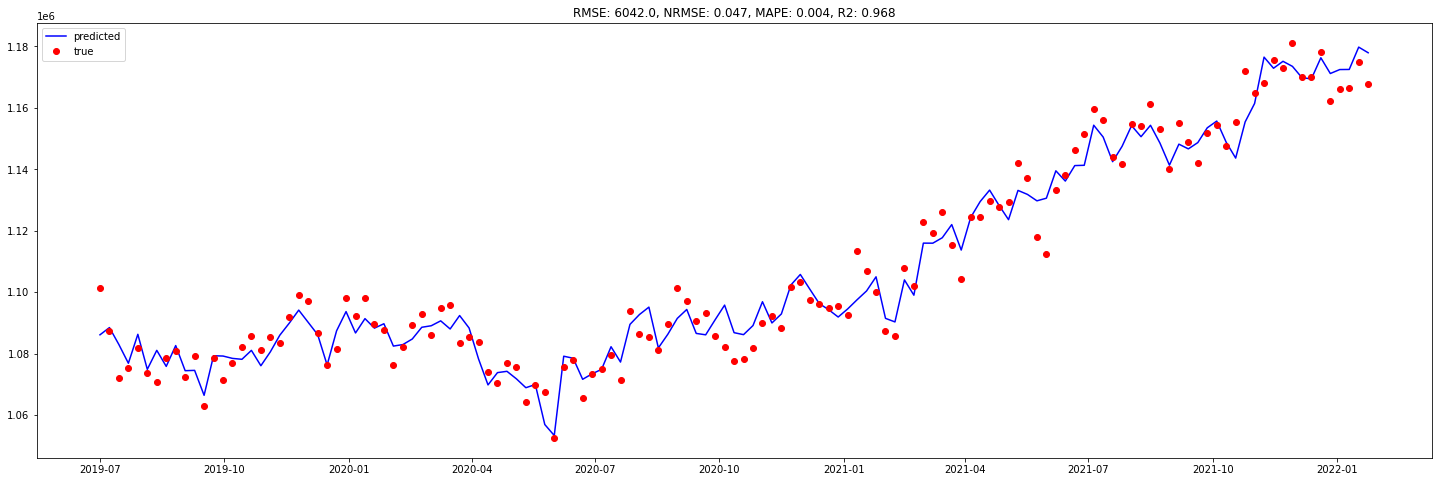

In [48]:
fig, ax = plt.subplots(figsize = (25, 8))
_ = ax.plot(df, color = "blue", label = "predicted")
_ = ax.plot(dfy, 'ro', label = "true")
_ = plt.title(f"RMSE: {np.round(rmse_metric)}, NRMSE: {np.round(nrmse_metric, 3)}, MAPE: {np.round(mape_metric, 3)}, R2: {np.round(r2_metric,3)}")
_ = ax.legend()

In [49]:
#Error metrics for datset from 135 to 158 weeks or how well the model fits unseen data
rmse_metric = mean_squared_error(y_true = y[135:], y_pred = tuned_model.predict(X[135:]), squared=False)
mape_metric = mean_absolute_percentage_error(y_true = y[135:], y_pred = tuned_model.predict(X[135:]))
nrmse_metric = nrmse(y[135:], tuned_model.predict(X[135:]))
r2_metric = r2_score(y_true = y[135:], y_pred = tuned_model.predict(X[135:]))
print(f'RMSE: {rmse_metric}')
print(f'MAPE: {mape_metric}')
print(f'NRMSE: {nrmse_metric}')
print(f'R2: {r2_metric}')

RMSE: 7406.212632724026
MAPE: 0.005016222047620701
NRMSE: 0.11001533868847285
R2: 0.8099682138318355


In [50]:
dfy = y.to_frame()

predicted = (tuned_model.predict(X))
df = pd.DataFrame(predicted, columns = ['predicted'])
df['date'] = data_copy["date"]
df = df[['date','predicted']]
df = df.set_index('date')

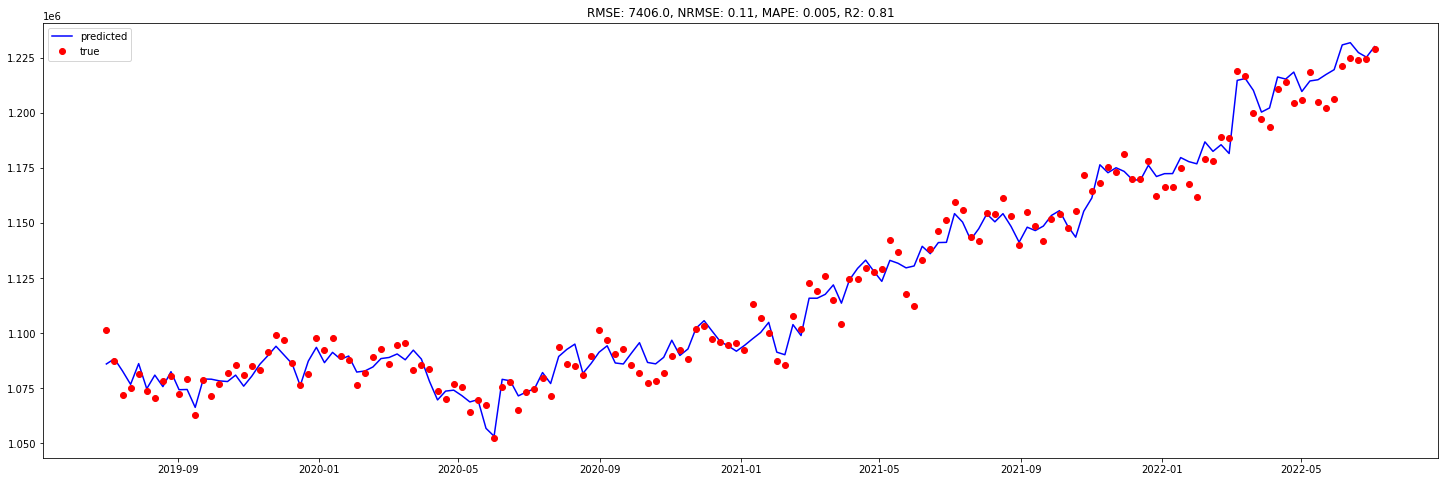

In [51]:
fig, ax = plt.subplots(figsize = (25, 8))
_ = ax.plot(df, color = "blue", label = "predicted")
_ = ax.plot(dfy, 'ro', label = "true")
_ = plt.title(f"RMSE: {np.round(rmse_metric)}, NRMSE: {np.round(nrmse_metric, 3)}, MAPE: {np.round(mape_metric, 3)}, R2: {np.round(r2_metric,3)}")
_ = ax.legend()